# Transforms: matrix examples that do not commute

JMA 4 Jan 2022

In [ ]:
import os, sys
from math import *
import numpy as np

import scipy.linalg as la

In [ ]:
# Diagonal matrix - act like vectors  - and do commute
identity = np.diag([1,1,1])
identity

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
#idempotent demonstration of the identity
 np.array([1,4,9]) @ identity @ identity

array([1, 4, 9])

In [ ]:
np.diag([2,4,8]) @ np.diag([1,4,9])  # @ np.array([1,1,1])

array([[ 2,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 72]])

In [ ]:
np.array([2,4,8]) *  np.array([1,4,9])

array([ 2, 16, 72])

# Permutation matrix
Permutations are re-orderings.  There are permutation matrici to compute them.

In [ ]:
def swap_cols(from_col, to_col, the_matrix = np.diag([1,1,1,1,1,1])):
  'Create a permutation matrix by swapping columns (indexes have origin = 0)'
    the_col = the_matrix[:,to_col].copy()
    the_matrix[:,to_col] = the_matrix[:,from_col]
    the_matrix[:,from_col] = the_col
    return the_matrix


swap_cols(3,4, swap_cols(0,1)) @ np.array([1,2,3,4,5,6])


array([2, 1, 3, 5, 4, 6])

In [ ]:
swap_cols(2,1, the_matrix = np.diag([1,1,1,1,1,1])) @ np.array([1,2,3,4,5,6])


array([1, 3, 2, 4, 5, 6])

# Rotation matrix

Rotations keep the vector length, but change its orientation around one axis

In [ ]:
def rotate_z(r):
    'Of three dimensions, x, y, z'
    return np.array([[cos(r), sin(r), 0], [-sin(r), cos(r), 0], [0, 0,1]])

np.round(rotate_z(pi/4) @ rotate_z(pi/4) ,2)
np.round( rotate_z(pi/4) @ np.array([1,0,0]) ,2)

array([ 0.71, -0.71,  0.  ])

In [ ]:
def rotate_y(r):
    'Of three dimensions, x, y, z'
    return np.array([[cos(r), 0, sin(r)], [0, 1, 0], [-sin(r), 0, cos(r)]])

rotate_y(pi/4 - 0.01)

array([[ 0.71414238,  0.        ,  0.70000048],
       [ 0.        ,  1.        ,  0.        ],
       [-0.70000048,  0.        ,  0.71414238]])

In [ ]:
e = 0 # 1E2
np.round(  rotate_z(pi/2 -e) @ np.array([1,0,0]),2)
np.round( rotate_y(pi/2 - e) @ rotate_z(pi/2 -e) @ np.array([1,0,0]),2)


array([ 0., -1., -0.])

In [ ]:
np.round(rotate_z(pi/2 -e) @ rotate_y(pi/2 - e)  @ np.array([1,0,0]),2)

array([ 0., -0., -1.])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

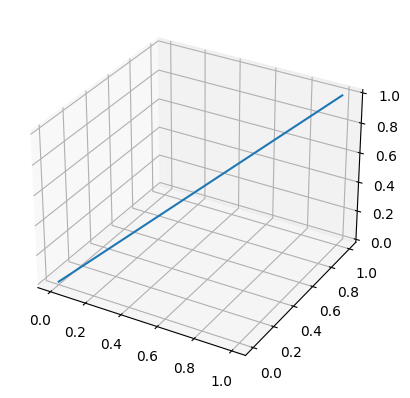

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D((0,1),(0,1),(0,1))

### Exercises with row-swap matrices -- used in LU decomposition

How to build the L matrix from the individual $E_{ij}$ row swap matrices.  See Strang ch 2.2


In [ ]:
def row_swapper(v, i,j, dim = 3):
  'Create a matrix with one offdiagonal entry v, at location i.j Used to create the  matrix'
  # This does one step in Gaussian Elimination.
  # Note indexes are zero based
  E = np.diag(dim*[1])
  E[i,j] = v
  return E

# Sometimes the inverse can be read off the individual swapper matrici
L_inv = row_swapper(3, 2,0)  @ row_swapper(1, 2,1)@ row_swapper(9, 1,)
L_inv, np.round(la.inv(L_inv))

(array([[ 1,  0,  0],
        [ 9,  1,  0],
        [12,  1,  1]]),
 array([[ 1.,  0.,  0.],
        [-9.,  1.,  0.],
        [-3., -1.,  1.]]))

In [ ]:
row_swapper(3, 2,0) @ identity  #, row_swapper(1, 2,1) ,row_swapper(9, 1,0)

array([[1, 0, 0],
       [0, 1, 0],
       [3, 0, 1]])

In [ ]:
# Sometimes not  - same swaps
L_inv =   row_swapper(9, 1,0) @ row_swapper(1, 2,1) @ row_swapper(3, 2,0)
L_inv, np.round(la.inv(L_inv))

(array([[1, 0, 0],
        [9, 1, 0],
        [3, 1, 1]]),
 array([[ 1.,  0.,  0.],
        [-9.,  1., -0.],
        [ 6., -1.,  1.]]))

In [ ]:
# Sometimes not  But there is a ordering based on the row indexes
# It appears a monotonic, lexical ordering of the row indexes have a product
# that just inserts a value a the i,j location. (!)
L_inv =  row_swapper(9, 1,0)  @ row_swapper(1, 2,0) @ row_swapper(7, 2,1)
L_inv, np.round(la.inv(L_inv))

(array([[1, 0, 0],
        [9, 1, 0],
        [1, 7, 1]]),
 array([[ 1.,  0.,  0.],
        [-9.,  1.,  0.],
        [62., -7.,  1.]]))

In [ ]:
# Sometimes not  - example from Strang p.31, Note theordering of the products
L_inv =  row_swapper(1, 2,0) @ row_swapper(-2, 1,0) @ row_swapper(1, 2,1)
L_inv, np.round(la.inv(L_inv))

(array([[ 1,  0,  0],
        [-2,  1,  0],
        [ 1,  1,  1]]),
 array([[ 1.,  0.,  0.],
        [ 2.,  1.,  0.],
        [-3., -1.,  1.]]))

In [ ]:
# Just one swap always works by negating the entry.
L_inv =  row_swapper(1, 1,0) @ row_swapper(2, 2, 0)
L_inv, np.round(la.inv(L_inv))

(array([[1, 0, 0],
        [1, 1, 0],
        [2, 0, 1]]),
 array([[ 1., -0.,  0.],
        [-1.,  1.,  0.],
        [-2.,  0.,  1.]]))